In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve

In [2]:
feature_data = pd.read_csv("ss21_processed_solutions/m0_feature_data.csv")
feature_data["binary_source"] = feature_data["source"].apply(lambda row: row if row=="student" else "ai")

features = list(feature_data.columns[6:-1])

In [4]:
features

['num_chars',
 'num_lines',
 'avg_line_length',
 'max_line_length',
 'num_scaled_comments',
 'num_scaled_if',
 'num_scaled_for',
 'num_scaled_switch',
 'num_scaled_digits',
 'num_scaled_exceptions',
 'num_scaled_empty_lines',
 'num_scaled_whitespace',
 'num_scaled_indents',
 'num_scaled_prints',
 'prop_spaces_around_assignments',
 'used_boolean',
 'used_List',
 'used_Integer',
 'used_Point',
 'used_ArrayList',
 'used_StringBuilder',
 'num_files',
 'num_scaled_method_declarations',
 'num_scaled_declared_fields',
 'num_scaled_local_variables',
 'num_scaled_classes',
 'num_scaled_field_references',
 'num_scaled_method_invocations',
 'num_scaled_imports',
 'avg_name_length',
 'max_name_length',
 'avg_comment_length',
 'max_comment_length',
 'scaled_edit_distance',
 'diff_num_chars',
 'diff_num_lines',
 'diff_avg_line_length',
 'diff_max_line_length',
 'diff_num_scaled_empty_lines',
 'diff_num_scaled_whitespace',
 'diff_num_scaled_indents']

In [4]:
feature_data

,source,milestone,name,style,version,code,num_chars,num_lines,avg_line_length,max_line_length,...,max_comment_length,scaled_edit_distance,diff_num_chars,diff_num_lines,diff_avg_line_length,diff_max_line_length,diff_num_scaled_empty_lines,diff_num_scaled_whitespace,diff_num_scaled_indents,binary_source
0,bard,m0,1,plain,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,2393,72,35.707692,99,...,0,4.791667,343,1,5.292308,4,0.013889,4.777778,4.777778,ai
1,bard,m0,10,styled,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,2345,81,31.444444,100,...,37,5.148148,415,1,5.777778,4,0.012346,5.135802,5.135802,ai
2,bard,m0,11,styled,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,2014,72,30.343750,97,...,0,6.041667,289,1,4.531250,2,0.013889,4.027778,5.083333,ai
3,bard,m0,12,styled,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,1930,61,31.677966,100,...,0,4.606557,276,4,4.745763,4,0.065574,4.590164,4.590164,ai
4,bard,m0,13,cc,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...,2729,85,37.771429,115,...,66,3.611765,209,7,5.824060,20,0.011765,2.541176,2.494118,ai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,student,m0,student92,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,2739,87,33.150000,61,...,0,8.632184,729,-13,4.254478,-4,0.000000,8.229885,8.505747,student
194,student,m0,student94,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\npub...,4578,158,31.798561,134,...,12,11.341772,1225,-27,3.030704,23,0.000000,7.582278,9.664557,student
195,student,m0,student96,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...,5241,161,40.967742,97,...,75,5.385093,832,-8,6.645161,9,-0.012422,5.118012,5.211180,student
196,student,m0,student97,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\n\...,3127,95,39.894737,107,...,43,6.473684,508,-18,0.787045,7,-0.010526,5.157895,5.663158,student


## Classifying the data using features

In [3]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(feature_data[features].values, feature_data["binary_source"], test_size=0.3, random_state=0)

Cross-validation on only the training data to find the best hyperparameters for the random forest classification model:

In [4]:
forest_binary_cv = GridSearchCV(RandomForestClassifier(random_state=0), param_grid={"n_estimators":np.arange(100,200,10),
                                                                                    "max_depth":[10, 20, 30, None], 
                                                                                    "max_features":[1, 0.9, 0.8, "sqrt", "log2"]}) 
forest_binary_cv.fit(X_train_binary, y_train_binary)
forest_binary_cv_results = pd.DataFrame(forest_binary_cv.cv_results_)
forest_binary_cv_results[forest_binary_cv_results["rank_test_score"]==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.097088,0.000633,0.009008,1.507891e-07,20,1,100,"{'max_depth': 20, 'max_features': 1, 'n_estima...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1
51,0.105496,0.000801,0.009609,4.905243e-04,20,1,110,"{'max_depth': 20, 'max_features': 1, 'n_estima...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1
100,0.097487,0.002579,0.008608,4.906217e-04,30,1,100,"{'max_depth': 30, 'max_features': 1, 'n_estima...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1
101,0.107898,0.000749,0.009409,4.903686e-04,30,1,110,"{'max_depth': 30, 'max_features': 1, 'n_estima...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1
150,0.096488,0.000490,0.009008,1.907349e-07,None,1,100,"{'max_depth': None, 'max_features': 1, 'n_esti...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1
151,0.107097,0.000633,0.009609,4.902129e-04,None,1,110,"{'max_depth': None, 'max_features': 1, 'n_esti...",0.892857,0.964286,0.857143,0.888889,0.925926,0.90582,0.03646,1


Training the model on the best found hyperparameters:

In [5]:
forest_binary = RandomForestClassifier(random_state=0, max_features=1, n_estimators=110, max_depth=None)
forest_binary.fit(X_train_binary, y_train_binary)

RandomForestClassifier(max_features=1, n_estimators=110, random_state=0)

Accuracy score on the test data:

In [6]:
np.round(accuracy_score(y_test_binary, forest_binary.predict(X_test_binary)), 3)

0.9

% of each source of solution that was misclassified (e.g. 18% of the student solutions in the test data were classified incorrectly):

In [7]:
misclassified_binary = y_test_binary != forest_binary.predict(X_test_binary)
(feature_data.loc[misclassified_binary.index[misclassified_binary]]["source"].value_counts() / feature_data.loc[y_test_binary.index]["source"].value_counts()).dropna() * 100

bing       11.111111
gpt4       12.500000
student    12.500000
Name: source, dtype: float64

Feature importance:

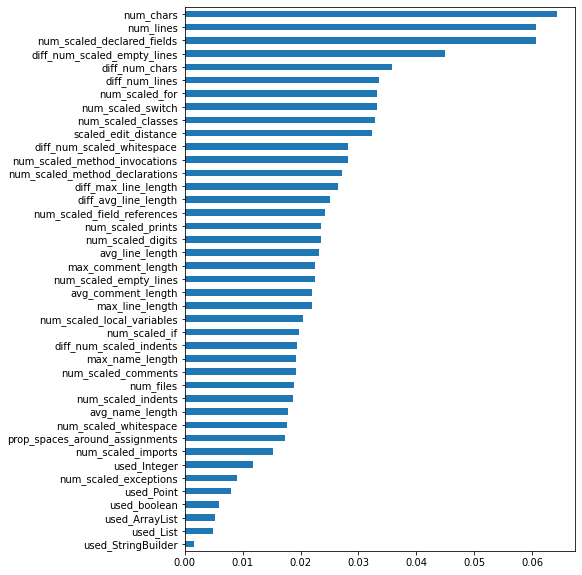

In [8]:
plt.figure(figsize=(7, 10))
ax = pd.Series(forest_binary.feature_importances_, index=features).sort_values(ascending=True).plot.barh()

In [9]:
X_train_binary_small, X_test_binary_small, y_train_binary_small, y_test_binary_small = train_test_split(feature_data[["num_lines", "num_scaled_declared_fields"]].values, feature_data["binary_source"], test_size=0.2, random_state=0)
small_forest_binary = RandomForestClassifier(random_state=0, max_features=1, n_estimators=100, max_depth=10)
small_forest_binary.fit(X_train_binary_small, y_train_binary_small)
np.round(accuracy_score(y_test_binary_small, small_forest_binary.predict(X_test_binary_small)), 3)

0.85

In [10]:
log_binary = LogisticRegression(max_iter=10000)
log_binary.fit(X_train_binary, y_train_binary)

LogisticRegression(max_iter=10000)

In [11]:
np.round(accuracy_score(y_test_binary, log_binary.predict(X_test_binary)), 3)

0.933

## Classifying each AI source against Student

Accuracy of predicting GPT4 versus Student: 0.926


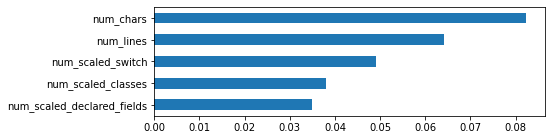

In [12]:
gpt4_data = feature_data[features + ["source"]].copy()
gpt4_data = gpt4_data[(gpt4_data["source"]=="gpt4")|(gpt4_data["source"]=="student")]
X_train_gpt4, X_test_gpt4, y_train_gpt4, y_test_gpt4 = train_test_split(gpt4_data[features].values, gpt4_data["source"], stratify=gpt4_data["source"], test_size=0.2, random_state=0)
forest_gpt4 = RandomForestClassifier(random_state=0, max_features=1, n_estimators=110, max_depth=None)
forest_gpt4.fit(X_train_gpt4, y_train_gpt4)
print("Accuracy of predicting GPT4 versus Student:", np.round(accuracy_score(y_test_gpt4, forest_gpt4.predict(X_test_gpt4)), 3))
plt.figure(figsize=(7, 2))
ax = pd.Series(forest_gpt4.feature_importances_, index=features).sort_values(ascending=True)[-5:].plot.barh()

Accuracy of predicting GPT3.5 versus Student: 0.92


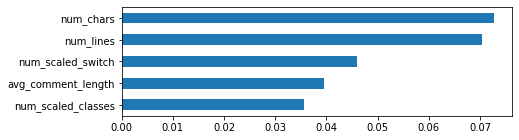

In [13]:
gpt35_data = feature_data[features + ["source"]].copy().copy()
gpt35_data = gpt35_data[(gpt35_data["source"]=="gpt3.5")|(gpt35_data["source"]=="student")]
X_train_gpt35, X_test_gpt35, y_train_gpt35, y_test_gpt35 = train_test_split(gpt35_data[features].values, gpt35_data["source"], stratify=gpt35_data["source"], test_size=0.2, random_state=0)
forest_gpt35 = RandomForestClassifier(random_state=0, max_features=1, n_estimators=110, max_depth=None)
forest_gpt35.fit(X_train_gpt35, y_train_gpt35)
print("Accuracy of predicting GPT3.5 versus Student:", np.round(accuracy_score(y_test_gpt35, forest_gpt35.predict(X_test_gpt35)), 3))
plt.figure(figsize=(7, 2))
ax = pd.Series(forest_gpt35.feature_importances_, index=features).sort_values(ascending=True)[-5:].plot.barh()

Accuracy of predicting Bard versus Student: 0.92


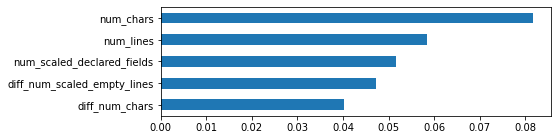

In [14]:
bard_data = feature_data[features + ["source"]].copy()
bard_data = bard_data[(bard_data["source"]=="bard")|(bard_data["source"]=="student")]
X_train_bard, X_test_bard, y_train_bard, y_test_bard = train_test_split(bard_data[features].values, bard_data["source"], stratify=bard_data["source"], test_size=0.2, random_state=0)
forest_bard = RandomForestClassifier(random_state=0, max_features=1, n_estimators=110, max_depth=None)
forest_bard.fit(X_train_bard, y_train_bard)
print("Accuracy of predicting Bard versus Student:", np.round(accuracy_score(y_test_bard, forest_bard.predict(X_test_bard)), 3))
plt.figure(figsize=(7, 2))
ax = pd.Series(forest_bard.feature_importances_, index=features).sort_values(ascending=True)[-5:].plot.barh()

Accuracy of predicting Bing versus Student: 0.852


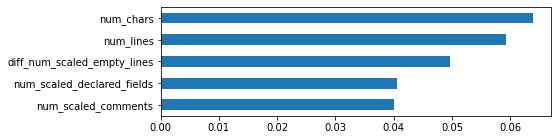

In [15]:
bing_data = feature_data[features + ["source"]].copy()
bing_data = bing_data[(bing_data["source"]=="bing")|(bing_data["source"]=="student")]
X_train_bing, X_test_bing, y_train_bing, y_test_bing = train_test_split(bing_data[features].values, bing_data["source"], stratify=bing_data["source"], test_size=0.2, random_state=0)
forest_bing = RandomForestClassifier(random_state=0, max_features=1, n_estimators=110, max_depth=None)
forest_bing.fit(X_train_bing, y_train_bing)
print("Accuracy of predicting Bing versus Student:", np.round(accuracy_score(y_test_bing, forest_bing.predict(X_test_bing)), 3))
plt.figure(figsize=(7, 2))
ax = pd.Series(forest_bing.feature_importances_, index=features).sort_values(ascending=True)[-5:].plot.barh()

## Classifying each source of data

A new model is trained on all of the data except for the data from each source. Then the trained model is used to try to predict the solutions from the source that it never saw during training.

In [16]:
for source in feature_data["source"].unique()[:-1]:
    feature_model = RandomForestClassifier(random_state=0, max_features=1, n_estimators=100, max_depth=10)
    
    feature_model.fit(feature_data[feature_data["source"] != source][features], feature_data[feature_data["source"] != source]["binary_source"])
    
    print(f"Accuracy on classifying {source}:", np.round(accuracy_score(feature_data[feature_data["source"] == source]["binary_source"], 
                                                            feature_model.predict(feature_data[feature_data["source"] == source][features])), 3)*100, "%")

Accuracy on classifying bard: 88.2 %
Accuracy on classifying bing: 53.6 %
Accuracy on classifying gpt3.5: 83.3 %
Accuracy on classifying gpt4: 83.89999999999999 %


## Predictions on the optimised/intervene solutions using features

In [5]:
optimised_data = pd.read_csv("ss21_processed_solutions/optimised_feature_data.csv")
optimised_data["binary_source"] = optimised_data["source"].apply(lambda row: row if row=="student" else "ai")

In [6]:
full_model = RandomForestClassifier(random_state=0, max_features=1, n_estimators=100, max_depth=10)
full_model.fit(feature_data[features].values, feature_data["binary_source"])

RandomForestClassifier(max_depth=10, max_features=1, random_state=0)

In [8]:
predictions = pd.concat([pd.DataFrame(full_model.predict_proba(optimised_data[features].values), columns=["Probability AI", "Probability Human"]),
                        optimised_data.reset_index(drop=True)], axis=1)
predictions.iloc[:,:8].sort_values("Probability Human", ascending=False)

,Probability AI,Probability Human,source,milestone,name,style,version,code
19,0.180000,0.820000,optimised,m0,4,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
4,0.194234,0.805766,intervene,m0,natasha4,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\np...
7,0.209629,0.790371,optimised,m0,11,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
23,0.250000,0.750000,optimised,m0,8,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
5,0.269936,0.730064,optimised,m0,1,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
9,0.280000,0.720000,optimised,m0,13,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
16,0.316731,0.683269,optimised,m0,2,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...
12,0.320833,0.679167,optimised,m0,16,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\nc...
3,0.332219,0.667781,intervene,m0,natasha3,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\nc...
14,0.340000,0.660000,optimised,m0,18,NaN,NaN,package thkoeln.st.st2praktikum.exercise;\n\ni...


## Model trained on optimised code

Training on a model on both the original data and the new optimised model-breaking solutions.  

What are the new feature importances?

A smaller sample of the original data is taken for the model, due to the much smaller number of optimised samples, allowing them both to have equal weight in the model.

In [16]:
optimised = optimised_data[optimised_data["source"] != "intervene"]

In [21]:
combined_data = pd.concat([feature_data[feature_data["source"] == "student"], 
                           feature_data[feature_data["source"] != "student"].sample(20, random_state=0),
                           optimised]).reset_index(drop=True)

In [22]:
alternate_model = RandomForestClassifier(random_state=0, max_features=1, n_estimators=100, max_depth=10)
alternate_model.fit(combined_data[features].values, combined_data["binary_source"])

RandomForestClassifier(max_depth=10, max_features=1, random_state=0)

"Number of characters" is now even more important. New important features include the "number of for loops".

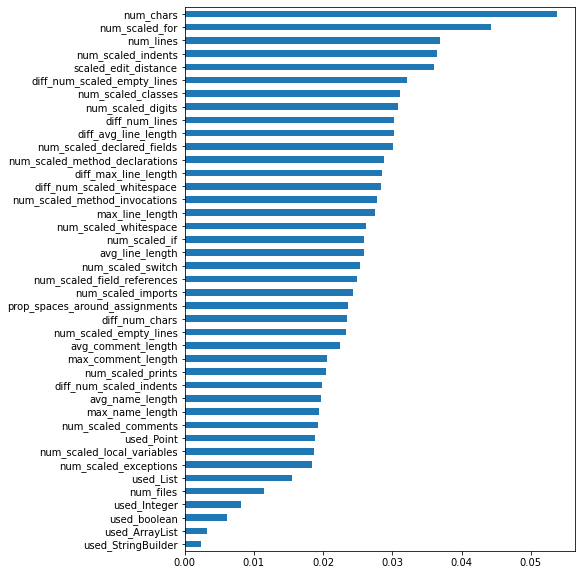

In [23]:
plt.figure(figsize=(7, 10))
ax = pd.Series(alternate_model.feature_importances_, index=features).sort_values(ascending=True).plot.barh()

Modelling only students versus optimised solutions:

In [24]:
all_students_optimised = pd.concat([feature_data[feature_data["source"] == "student"], optimised]).reset_index(drop=True)

In [25]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(all_students_optimised[features].values, 
                                                                                all_students_optimised["binary_source"], test_size=0.3, random_state=0)

In [26]:
alternate_model = RandomForestClassifier(random_state=0, max_features=1, n_estimators=100, max_depth=10)
alternate_model.fit(X_train_binary, y_train_binary)

RandomForestClassifier(max_depth=10, max_features=1, random_state=0)

In [27]:
np.round(accuracy_score(y_test_binary, alternate_model.predict(X_test_binary)), 3)

0.921

The same accuracy is retained even after optimised prompts are generated - the model simply adapts.

In [28]:
misclassified_binary = y_test_binary != alternate_model.predict(X_test_binary)
(feature_data.loc[misclassified_binary.index[misclassified_binary]]["source"].value_counts() / all_students_optimised.loc[y_test_binary.index]["source"].value_counts()).dropna() * 100

student    8.823529
Name: source, dtype: float64

The number of characters remains a key feature. The number of indents, edit distance and whitespace now become key features.

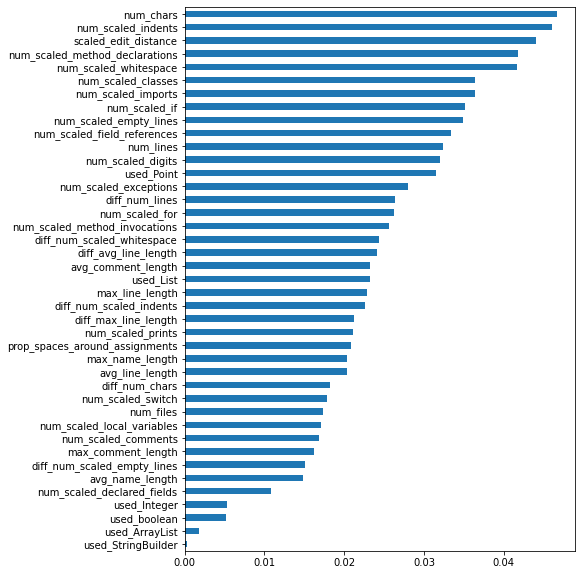

In [29]:
plt.figure(figsize=(7, 10))
ax = pd.Series(alternate_model.feature_importances_, index=features).sort_values(ascending=True).plot.barh()